# Partie II: Prétraitement du Texte

## ========================================
## NOTEBOOK 2 : PRÉTRAITEMENT DU TEXTE
## Projet Classification de CV - LiveCareer
## ========================================

### Prétraitement du Texte des CV

#### **Objectif** : Nettoyer et normaliser le texte des CV pour l'apprentissage machine
 
#### **Étapes** :
##### 1. Chargement des données brutes
##### 2. Nettoyage du texte (URLs, emails, ponctuation, etc.)
##### 3. Lemmatisation et normalisation
##### 4. Sauvegarde des données nettoyées

### 1. Imports et Configuration

In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

# Télécharger les ressources NLTK nécessaires
print(" Téléchargement des ressources NLTK...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('omw-1.4', quiet=True)

print(" Imports réussis!")

 Téléchargement des ressources NLTK...
 Imports réussis!


### 2. Chargement des Données Brutes

In [7]:
# Charger le dataset original
df = pd.read_csv('../data/raw/resume_dataset.csv')

print(f" Dataset chargé:")
print(f"   - Nombre de CV: {len(df)}")
print(f"   - Colonnes: {df.columns.tolist()}")

# Afficher un exemple
print("\n Exemple de CV brut:")
print("="*80)
text_col = 'Resume'  # Ajustez selon votre dataset
print(df[text_col].iloc[0][:500] + "...")

 Dataset chargé:
   - Nombre de CV: 169
   - Colonnes: ['Category', 'Resume']

 Exemple de CV brut:
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib...


### 3. Définition de la Classe TextCleaner

In [10]:
class TextCleaner:
    """Classe pour nettoyer et prétraiter le texte des CV"""
    
    def __init__(self):
        """Initialiser les outils de nettoyage"""
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        
        print(" TextCleaner initialisé")
        print(f"   - Stopwords: {len(self.stop_words)} mots")
    
    def clean_text(self, text):
        """
        Nettoyer un texte unique
        
        Étapes:
        1. Minuscules
        2. Supprimer URLs
        3. Supprimer emails
        4. Supprimer téléphones
        5. Supprimer ponctuation
        6. Tokenisation
        7. Supprimer stopwords
        8. Lemmatisation
        """
        if not isinstance(text, str):
            text = str(text)
        
        # 1. Minuscules
        text = text.lower()
        
        # 2. Supprimer URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # 3. Supprimer emails
        text = re.sub(r'\S+@\S+', '', text)
        
        # 4. Supprimer numéros de téléphone
        text = re.sub(r'(\+\d{1,3}[-.\s]?)?\(?\d{1,4}\)?[-.\s]?\d{1,4}[-.\s]?\d{1,9}', '', text)
        
        # 5. Supprimer ponctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # 6. Normaliser les espaces
        text = re.sub(r'\s+', ' ', text).strip()
        
        # 7. Tokenisation
        tokens = word_tokenize(text)
        
        # 8. Supprimer stopwords et mots courts
        tokens = [word for word in tokens 
                 if word not in self.stop_words and len(word) > 2]
        
        # 9. Lemmatisation
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        
        return ' '.join(tokens)
    
    def clean_dataframe(self, df, text_column='Resume', output_column='cleaned_text'):
        """Nettoyer une colonne de DataFrame"""
        print(f"\n Nettoyage de {len(df)} CV...")
        
        # Appliquer le nettoyage avec barre de progression
        tqdm.pandas(desc="Nettoyage")
        df[output_column] = df[text_column].progress_apply(self.clean_text)
        
        # Calculer les statistiques
        avg_before = df[text_column].astype(str).apply(len).mean()
        avg_after = df[output_column].apply(len).mean()
        reduction = ((avg_before - avg_after) / avg_before) * 100
        
        print(f"\n Nettoyage terminé!")
        print(f"   Longueur moyenne avant: {avg_before:.0f} caractères")
        print(f"   Longueur moyenne après: {avg_after:.0f} caractères")
        print(f"   Réduction: {reduction:.1f}%")
        
        return df

# Créer l'instance du cleaner
cleaner = TextCleaner()

 TextCleaner initialisé
   - Stopwords: 198 mots


### 4. Test sur un Exemple

In [13]:
# Prendre un CV exemple
sample_cv = df[text_col].iloc[0]

print(" AVANT NETTOYAGE:")
print("="*80)
print(sample_cv[:500] + "...")

# Nettoyer
cleaned_sample = cleaner.clean_text(sample_cv)

print("\n APRÈS NETTOYAGE:")
print("="*80)
print(cleaned_sample[:500] + "...")

print(f"\n STATISTIQUES:")
print(f"   Longueur originale: {len(sample_cv)} caractères")
print(f"   Longueur nettoyée:  {len(cleaned_sample)} caractères")
print(f"   Réduction: {((len(sample_cv) - len(cleaned_sample)) / len(sample_cv)) * 100:.1f}%")

 AVANT NETTOYAGE:
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib...

 APRÈS NETTOYAGE:
skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm naã¯ve bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau 

### 5. Nettoyage de Tout le Dataset

In [16]:
# Nettoyer tous les CV
df = cleaner.clean_dataframe(df, text_column=text_col, output_column='cleaned_text')

# Afficher les premières lignes
print("\n Aperçu du DataFrame nettoyé:")
df[['Category', 'cleaned_text']].head()


 Nettoyage de 169 CV...


Nettoyage: 100%|████████████████████████████████████████████████████████████████████| 169/169 [00:01<00:00, 139.01it/s]


 Nettoyage terminé!
   Longueur moyenne avant: 2949 caractères
   Longueur moyenne après: 2345 caractères
   Réduction: 20.5%

 Aperçu du DataFrame nettoyé:


,Category,cleaned_text
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may uitrgpvdata scientist...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill â¢ â¢ python â¢ sap hana â¢ tableau ...
4,Data Science,education detail mca ymcaust faridabad haryana...


### 6. Analyse du Nettoyage

In [19]:
# Calculer les longueurs avant/après
df['length_before'] = df[text_col].astype(str).apply(len)
df['length_after'] = df['cleaned_text'].apply(len)
df['reduction_percent'] = ((df['length_before'] - df['length_after']) / df['length_before']) * 100

print("\n STATISTIQUES DE NETTOYAGE:")
print("="*60)
print(df[['length_before', 'length_after', 'reduction_percent']].describe())


 STATISTIQUES DE NETTOYAGE:
       length_before  length_after  reduction_percent
count     169.000000    169.000000         169.000000
mean     2949.136095   2344.591716          19.981025
std      2633.897546   2070.189891           3.268137
min       133.000000    107.000000          12.681913
25%      1022.000000    802.000000          17.627402
50%      2346.000000   1838.000000          19.746377
75%      3804.000000   3042.000000          22.140085
max     14807.000000  11489.000000          38.631985


### 7. Visualisation de l'Impact du Nettoyage

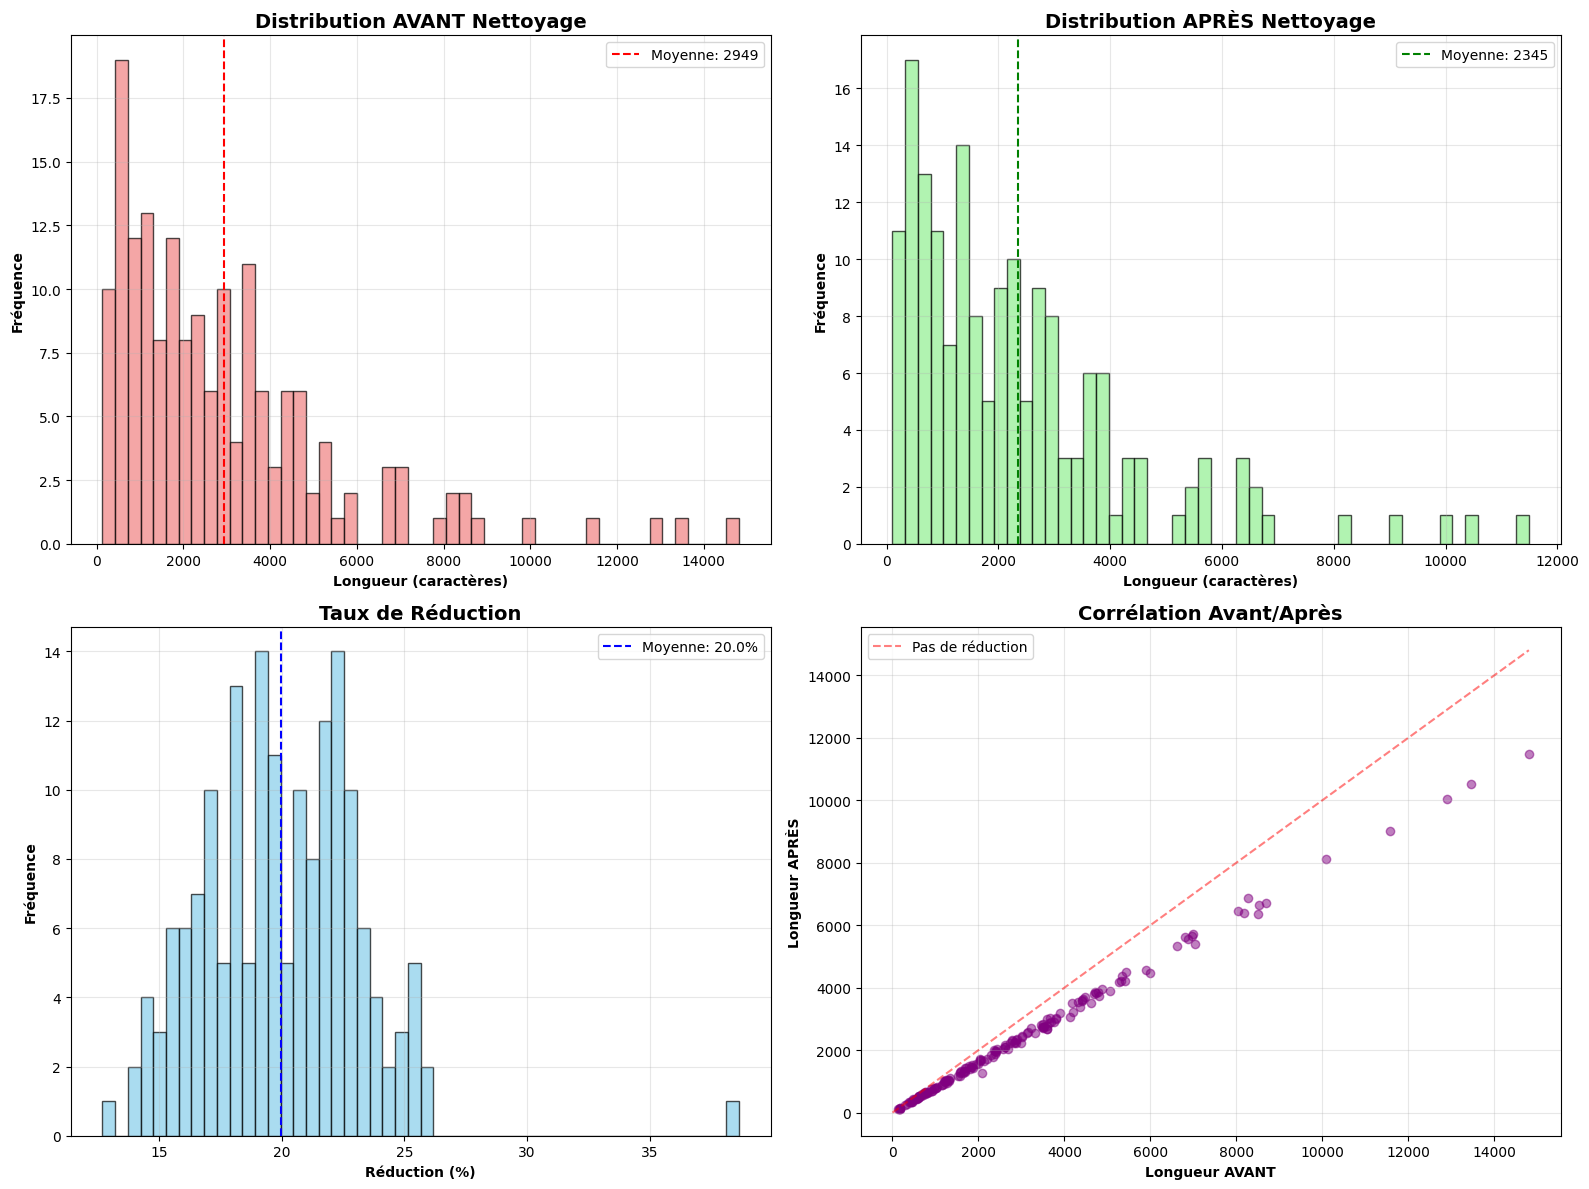

 Graphique sauvegardé dans outputs/plots/cleaning_impact.png


In [22]:
# Créer des visualisations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution longueurs avant
axes[0, 0].hist(df['length_before'], bins=50, color='lightcoral', 
               edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Longueur (caractères)', fontweight='bold')
axes[0, 0].set_ylabel('Fréquence', fontweight='bold')
axes[0, 0].set_title('Distribution AVANT Nettoyage', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df['length_before'].mean(), color='red', linestyle='--', 
                   label=f'Moyenne: {df["length_before"].mean():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Distribution longueurs après
axes[0, 1].hist(df['length_after'], bins=50, color='lightgreen', 
               edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Longueur (caractères)', fontweight='bold')
axes[0, 1].set_ylabel('Fréquence', fontweight='bold')
axes[0, 1].set_title('Distribution APRÈS Nettoyage', fontsize=14, fontweight='bold')
axes[0, 1].axvline(df['length_after'].mean(), color='green', linestyle='--',
                   label=f'Moyenne: {df["length_after"].mean():.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Réduction en pourcentage
axes[1, 0].hist(df['reduction_percent'], bins=50, color='skyblue',
               edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Réduction (%)', fontweight='bold')
axes[1, 0].set_ylabel('Fréquence', fontweight='bold')
axes[1, 0].set_title('Taux de Réduction', fontsize=14, fontweight='bold')
axes[1, 0].axvline(df['reduction_percent'].mean(), color='blue', linestyle='--',
                   label=f'Moyenne: {df["reduction_percent"].mean():.1f}%')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Scatter avant vs après
sample_df = df.sample(min(1000, len(df)))
axes[1, 1].scatter(sample_df['length_before'], sample_df['length_after'],
                  alpha=0.5, c='purple')
axes[1, 1].set_xlabel('Longueur AVANT', fontweight='bold')
axes[1, 1].set_ylabel('Longueur APRÈS', fontweight='bold')
axes[1, 1].set_title('Corrélation Avant/Après', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Ligne de référence (si pas de réduction)
max_val = max(df['length_before'].max(), df['length_after'].max())
axes[1, 1].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Pas de réduction')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../outputs/plots/cleaning_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/cleaning_impact.png")

### 8. Analyse des Mots les Plus Fréquents

In [25]:
from collections import Counter

# Extraire tous les mots nettoyés
all_words = ' '.join(df['cleaned_text'].values).split()
word_freq = Counter(all_words)

# Top 30 mots
top_30 = word_freq.most_common(30)

print("\n TOP 30 MOTS APRÈS NETTOYAGE:")
print("="*60)
for i, (word, count) in enumerate(top_30, 1):
    print(f"{i:2d}. {word:20s} : {count:7d}")


 TOP 30 MOTS APRÈS NETTOYAGE:
 1. â¢                  :    1949
 2. exprience            :     634
 3. company              :     618
 4. project              :     610
 5. description          :     551
 6. detail               :     546
 7. month                :     546
 8. data                 :     372
 9. database             :     336
10. system               :     321
11. management           :     312
12. team                 :     298
13. year                 :     266
14. server               :     250
15. maharashtra          :     233
16. client               :     221
17. test                 :     218
18. report               :     211
19. using                :     210
20. sql                  :     209
21. technology           :     209
22. business             :     207
23. testing              :     207
24. le                   :     206
25. requirement          :     203
26. application          :     203
27. service              :     196
28. january             

### 9. Comparaison Avant/Après par Catégorie


 STATISTIQUES PAR CATÉGORIE (Top 10):
                    length_before  length_after  reduction_percent
Category                                                          
Advocate                   944.70        752.10              19.68
Arts                      2284.50       1672.17              25.58
Automation Testing        3788.14       3107.57              18.26
Blockchain                2281.20       1843.60              18.93
Business Analyst          4357.67       3470.33              19.17
Civil Engineer            3060.17       2402.83              19.08
Data Science              3204.10       2552.70              20.59
Database                  3864.91       3113.36              19.28
DevOps Engineer           4564.29       3656.71              20.61
DotNet Developer          2808.29       2182.14              21.27


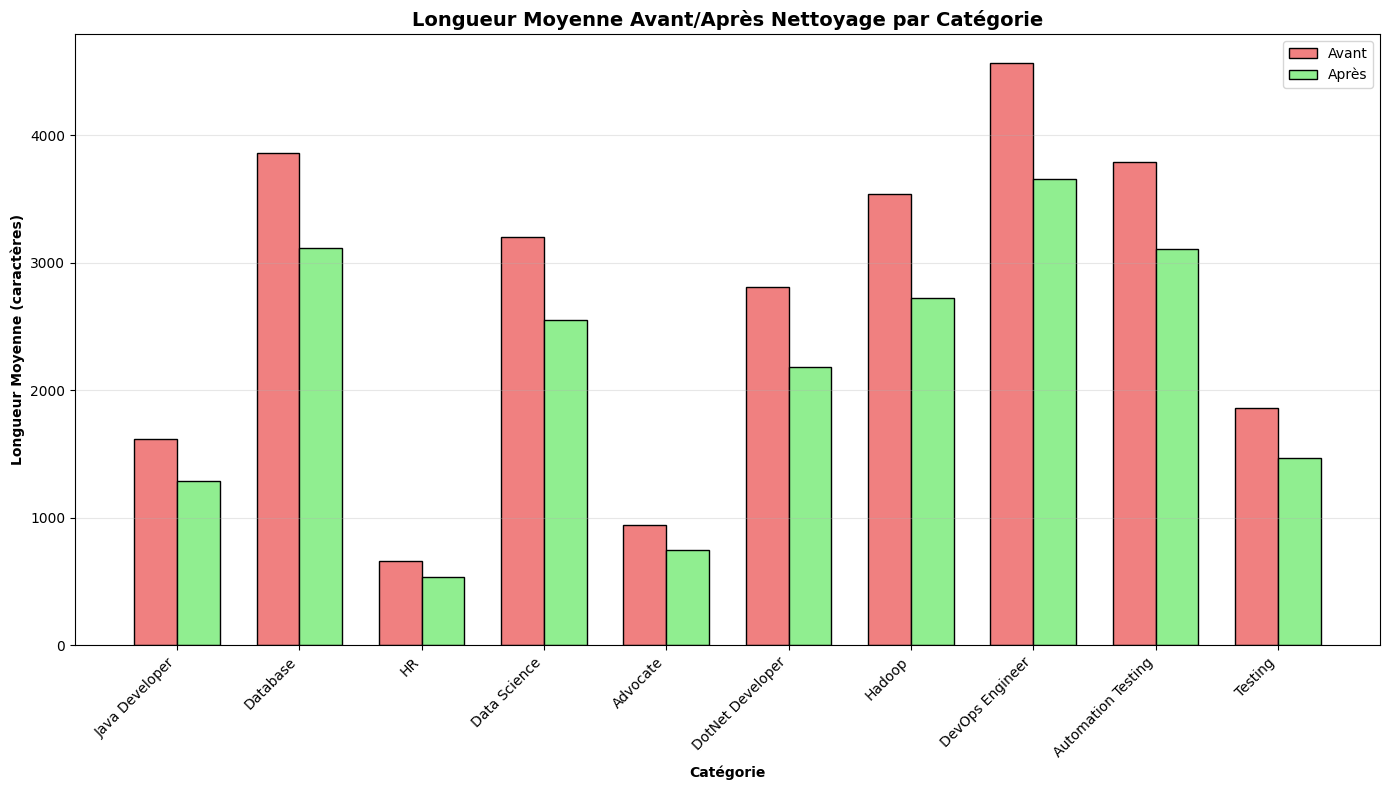

 Graphique sauvegardé


In [28]:
# Calculer la longueur moyenne par catégorie
category_col = 'Category'
category_stats = df.groupby(category_col).agg({
    'length_before': 'mean',
    'length_after': 'mean',
    'reduction_percent': 'mean'
}).round(2)

print("\n STATISTIQUES PAR CATÉGORIE (Top 10):")
print("="*80)
print(category_stats.head(10))

# Visualiser
fig, ax = plt.subplots(figsize=(14, 8))

top_10_categories = df[category_col].value_counts().head(10).index
category_stats_top10 = category_stats.loc[top_10_categories]

x = np.arange(len(top_10_categories))
width = 0.35

bars1 = ax.bar(x - width/2, category_stats_top10['length_before'], width,
              label='Avant', color='lightcoral', edgecolor='black')
bars2 = ax.bar(x + width/2, category_stats_top10['length_after'], width,
              label='Après', color='lightgreen', edgecolor='black')

ax.set_xlabel('Catégorie', fontweight='bold')
ax.set_ylabel('Longueur Moyenne (caractères)', fontweight='bold')
ax.set_title('Longueur Moyenne Avant/Après Nettoyage par Catégorie', 
            fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_10_categories, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/cleaning_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé")

### 10. Sauvegarde des Données Nettoyées

In [31]:
# Sauvegarder le DataFrame nettoyé
output_path = '../data/processed/resume_cleaned.csv'
df.to_csv(output_path, index=False)

print(f" Données nettoyées sauvegardées dans: {output_path}")
print(f"   Colonnes sauvegardées: {df.columns.tolist()}")
print(f"   Nombre de lignes: {len(df)}")

# Sauvegarder aussi une version compacte (seulement les colonnes essentielles)
df_compact = df[[category_col, 'cleaned_text']].copy()
df_compact.to_csv('../data/processed/resume_cleaned_compact.csv', index=False)

print(f"\n Version compacte sauvegardée dans: resume_cleaned_compact.csv")

 Données nettoyées sauvegardées dans: ../data/processed/resume_cleaned.csv
   Colonnes sauvegardées: ['Category', 'Resume', 'cleaned_text', 'length_before', 'length_after', 'reduction_percent']
   Nombre de lignes: 169

 Version compacte sauvegardée dans: resume_cleaned_compact.csv


### 11. Résumé et Prochaines Étapes

In [35]:
print("\n" + "="*80)
print(" RÉSUMÉ DU PRÉTRAITEMENT")
print("="*80)

print(f"""
 DONNÉES TRAITÉES:
   - CV nettoyés: {len(df)}
   - Réduction moyenne: {df['reduction_percent'].mean():.1f}%
   - Longueur moyenne avant: {df['length_before'].mean():.0f} caractères
   - Longueur moyenne après: {df['length_after'].mean():.0f} caractères

 FICHIERS CRÉÉS:
   - data/processed/resume_cleaned.csv (complet)
   - data/processed/resume_cleaned_compact.csv (compact)
   - outputs/plots/cleaning_impact.png
   - outputs/plots/cleaning_by_category.png

 MOTS LES PLUS FRÉQUENTS (Top 5):
""")

for i, (word, count) in enumerate(top_30[:5], 1):
    print(f"   {i}. {word} ({count:,} occurrences)")

print(f"""
 PROCHAINES ÉTAPES:
   1. Feature Extraction (TF-IDF) → Notebook 03
   2. Modélisation → Notebook 04
   3. Évaluation → Notebook 05
   
 Passez au Notebook 03_feature_extraction.ipynb
""")


 RÉSUMÉ DU PRÉTRAITEMENT

 DONNÉES TRAITÉES:
   - CV nettoyés: 169
   - Réduction moyenne: 20.0%
   - Longueur moyenne avant: 2949 caractères
   - Longueur moyenne après: 2345 caractères

 FICHIERS CRÉÉS:
   - data/processed/resume_cleaned.csv (complet)
   - data/processed/resume_cleaned_compact.csv (compact)
   - outputs/plots/cleaning_impact.png
   - outputs/plots/cleaning_by_category.png

 MOTS LES PLUS FRÉQUENTS (Top 5):

   1. â¢ (1,949 occurrences)
   2. exprience (634 occurrences)
   3. company (618 occurrences)
   4. project (610 occurrences)
   5. description (551 occurrences)

 PROCHAINES ÉTAPES:
   1. Feature Extraction (TF-IDF) → Notebook 03
   2. Modélisation → Notebook 04
   3. Évaluation → Notebook 05
   
 Passez au Notebook 03_feature_extraction.ipynb



## --------------------------------------------
### FIN DU PRÉTRAITEMENT
 
#### Les données sont maintenant prêtes pour l'extraction de features !